In [1]:
import os
import pymysql
import pymongo
import pandas as pd
from sqlalchemy import create_engine

In [2]:
AJNA_CONSULTA=os.environ['SQL_URI']
engine = create_engine(AJNA_CONSULTA)



In [3]:
SQL = 'SELECT * FROM dbmercante.bagagens_dsi '
df_dsis = pd.read_sql(SQL, engine)

In [4]:
df_dsis.head()

,ID,numero,data_registro,consignatario,despachante,numeroCEmercante,descricao
0,1,2100045516,2021-06-08,15604969672,051702567-1,152105130386270,"TRATA-SE DE BENS PESSOAIS USADOS, TAIS COMO AR..."
1,2,2100044722,2021-06-04,52956970704,729391098-3,152105132654884,MERCADORIA ESPECIFICADA CONFORME RELACAO DE BE...
2,3,1300312820,2013-11-25,22085046827,058246928-7,151305236540389,"ITEM""QTDE.""UNID.""DESCRICAO - USADOS""VALOR R$ 1..."
3,4,1400007395,2014-01-10,59114282968,164391550-9,151305264236303,ITEM QUANT DESCRICAO¿ 1 1 TENIS¿ 2 10 COSMETIC...
4,5,2100049872,2021-06-29,31038489865,098050238-1,152105149386489,CONFORME LISTA DE BENS USADOS ANEXA


10053

In [56]:
from random import randint
PERCENT = 2
def pseudo_random(row):
    divisor = 100 / PERCENT
    dsi = int(row.numero)
    dia = row.data_registro.day
    selecionado = (dsi % (divisor + randint(-5, 5))) == abs(dia + randint(-5, 21))
    return selecionado
    

df_selecionados = df_dsis.apply(pseudo_random, axis=1)
num_selecionados = sum(df_selecionados)
num_total = len(df_dsis)
print(f'{num_selecionados} selecionados de um total de {num_total} ({(num_selecionados/num_total)*100:0.2f}%)')
df_dsis[df_selecionados]
    
    

198 selecionados de um total de 10053 (1.97%)


,ID,numero,data_registro,consignatario,despachante,numeroCEmercante,descricao
34,35,2000097123,2020-12-07 00:00:00,70681436603,250909548-0,42502278,"UTENSILIOS DE COZINHA,TRANSFORMADOR,RELOGIO,BO..."
37,38,2100047381,2021-06-17 00:00:00,59255536834,053803128-0,152105138048269,01 CONTAINER COM 293 VOLUMES. BAGAGEM - BENS D...
47,48,2100047500,2021-06-17 00:00:00,15697540809,098050238-1,152105141007411,CONFORME LISTA DE BENS USADOS ANEXA
107,108,2100050323,2021-06-29 00:00:00,23164808020,064907819-5,182105147568387,"BENS, ROUPAS E OBJETOS DE USO PESSOAL ACONDICI..."
180,181,2100050285,2021-06-29 00:00:00,71667957198,162382628-4,152105141654360,ITEM QTDE. N° DA CAIXA DESCRICAO VALOR FOB (US...
...,...,...,...,...,...,...,...
9837,9982,2200058962,2022-09-05 13:23:47,37064413817,None,152205210984475,None
9976,10121,2200061106,2022-09-13 11:59:46,12400556415,None,None,None
10029,10174,2200062749,2022-09-20 11:14:57,90910095604,None,152205224825420,None
10045,10190,2200063125,2022-09-20 18:08:00,30368579824,None,152205213916594,None


In [61]:
# Simulação de Monte Carlo
simulacoes = []
num_total = len(df_dsis)
for counter in range(100):
    df_selecionados = df_dsis.apply(pseudo_random, axis=1)
    num_selecionados = sum(df_selecionados)
    simulacoes.append((num_selecionados/num_total)*100)
    

array([[<AxesSubplot:title={'center':'percentual'}>]], dtype=object)

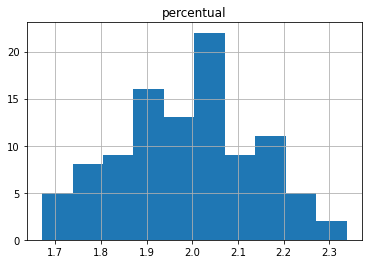

In [62]:
pd.DataFrame(simulacoes, columns=['percentual']).hist()

In [64]:
pd.DataFrame(simulacoes, columns=['percentual']).describe()

,percentual
count,100.000000
mean,1.988262
std,0.149275
min,1.671143
25%,1.889983
50%,1.989456
75%,2.098876
max,2.337611
